In [18]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [36]:
greve_twitter=pd.read_csv('greve_twitter_final.csv', sep='^([^,]+),', engine='python', error_bad_lines=False, encoding='utf-8', index_col=[0])

In [37]:
greve_twitter.head()

,polarity,statutnull
NaN,negatif,"""Je me suis fatigué du tournoi de baseball de ..."
NaN,positif,@ Ur boo. je suis plutôt d'accord . La vie est...
NaN,negatif,Pps? Désolé pour votre animal de compagnie
NaN,negatif,Je suis tellement fatigué de faim et il est 2 ...
NaN,positif,Bonne fête des mères !!!!!! Le meilleur aujour...


In [38]:
greve_twitter.polarity.value_counts().plot(kind='bar')

positif    502
negatif    498
Name: polarity, dtype: int64

In [39]:
#nécessaire?
def clean_up(tweet):
    import re
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    tweet = re.sub(r'http\S+|(pic.twitter\.[^\s]+)|(www\.[^\s]+)|(@\S+)|\s\s+|[^\w\s]',' ',tweet) 
    #1:http+suite/2.pic.twitter+suite/3.www.+suite/4.@+suite/5.espaces++/6.ponctuation
    tweet = tweet.lower().strip() #bdc
    tweet = word_tokenize(tweet) #tokenisation
    stop_words = stopwords.words('french') #stopwords nltk
    stop_words.append('rt') #+'rt'
    tweet = [word for word in tweet if word not in stop_words]
    tweet = [word for word in tweet if len(word)>1] #exclus mot de 1 lettre
    return tweet #retour sans tokenisation, requis par spacy
greve_twitter.statutnull = greve_twitter.statutnull.apply(lambda s: clean_up(s))
greve_twitter.head()

,polarity,statutnull
NaN,negatif,"[fatigué, tournoi, baseball, peter, allé, henr..."
NaN,positif,"[ur, boo, plutôt, accord, vie, vivre, regarder..."
NaN,negatif,"[pps, désolé, animal, compagnie]"
NaN,negatif,"[tellement, fatigué, faim, heures, jusqu, heur..."
NaN,positif,"[bonne, fête, mères, meilleur, aujourd, hui, t..."


(-0.5, 799.5, 499.5, -0.5)

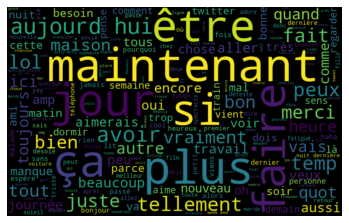

In [43]:
all_text= ' '.join([x for text in greve_twitter.statutnull for x in text])
wordcloud = WordCloud(width=800, height=500, random_state=21,max_font_size=110).generate(all_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

In [ ]:
#évolution dans le temps de l'opinion
#suppr horaires, garder date simple
date_twitter = greve_twitter.groupby(greve_twitter['date'])['polarity'].count()
date_twitter.plot(kind='line',figsize=(10,5))

In [ ]:
#séparation des dataframes en positif et negatif
greve_negatif = greve_twitter.tweet=='negatif'
greve_positif = greve_twitter.tweet=='positif'
greve_negatif.head()

In [ ]:
#df négatifs + wordcloud
text_negatif = ' '.join([x for text in greve_negatif.tweet for x in text])
wordcloud = WordCloud(width=800, height=500, random_state=21,max_font_size=110).generate(text_negatif)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

In [ ]:
#df positifs + wordcloud
text_positif = ' '.join([x for text in greve_positif.tweet for x in text])
wordcloud = WordCloud(width=800, height=500, random_state=21,max_font_size=110).generate(text_positif)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

In [ ]:
#nouvelle colonne avec seulement adjectif
from nltk.tag.stanford import StanfordPOSTagger
java_path = "C:/Program Files (x86)/Java/jre1.8.0_231/bin/java.exe"
os.environ['JAVAHOME'] = java_path
root_path="./stanford-postagger-full-2018-10-16/"
pos_tagger = StanfordPOSTagger(root_path + "models/french.tagger", root_path + "stanford-postagger.jar",encoding='utf8') #instance de la classe StanfordPOSTagger en UTF-8
adj_neg=[]
for index, value in greve_negatif.tweet.iteritems():
    [adj_neg.append(word) for word, tags in pos_tagger.tag(value) if tags=='Adj'] 
adj_pos=[]
for index, value in greve_positif.tweet.iteritems():
    [adj_pos.append(word) for word, tags in pos_tagger.tag(value) if tags=='Adj'] 

In [ ]:
import numpy as np
adj_pos,count = np.unique(adj_pos, return_counts=True)